# LIBRARIES

In [89]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

import matplotlib as mpl
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
sns.set()

#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

#Python standard libraries
import time
import warnings

# IMPORTING DATA 

dataset from [kaggle](https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014)

In [90]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
%cd /content/gdrive/My Drive/Colab Notebooks/Dataset/

/content/gdrive/My Drive/Colab Notebooks/Dataset


In [92]:
data= pd.read_csv('LoanData2007_2014.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



# EXPLORING DATA 

In [93]:
data.shape

(466285, 74)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [95]:
data.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
415461,13456920,15509220,35000,35000,35000.0,60 months,21.18,950.42,E,E3,Global HR Operations Manager,2 years,MORTGAGE,110000.0,Source Verified,Apr-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,182xx,PA,26.02,0.0,Feb-90,1.0,NaN,NaN,18.0,0.0,48596,83.8,43.0,w,0.0,0.0,43162.14,43162.14,35000.0,8162.14,0.0,0.0,0.0,Jun-15,30806.68,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,390014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58000.0,NaN,NaN,NaN


In [96]:
data.id.nunique()

466285

In [97]:
data.member_id.nunique()

466285

Terlihat bahwa tidak ada `id` atau `member_id` yang duplikat, artinya setiap baris sudah mewakili satu individu.

Selanjutnya, pembuangan fitur-fitur yang tidak berguna dilakukan. Contohnya seperti fitur yang merupakan id unik, berupa free text, nilainya kosong semua (NULL), dsb.

In [98]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'

    #dropping irrelevant cols
    ,'emp_title'
    ,'title'
    ,'next_pymnt_d' 
    ,'collection_recovery_fee'
    ,'recoveries'
    ,'total_rec_prncp'
    ,'total_rec_late_fee'
    ,'desc'
    ,'mths_since_last_record'
    ,'mths_since_last_major_derog'
    ,'policy_code'
]

In [99]:
data = data.drop(cols_to_drop, axis=1)

In [100]:
data.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
101811,9600,9600,9600.0,36 months,7.62,299.15,A,6 years,MORTGAGE,83000.0,Not Verified,Aug-13,Fully Paid,n,debt_consolidation,AZ,23.55,0.0,Sep-96,1.0,NaN,15.0,0.0,5626,15.9,35.0,w,0.00,0.00,10619.98000,10619.98,1019.98,Jul-15,4038.68,Aug-15,0.0,INDIVIDUAL,0.0,0.0,243192.0,35300.0
426001,10000,10000,10000.0,36 months,15.61,349.65,C,3 years,MORTGAGE,35000.0,Not Verified,Mar-14,Current,n,debt_consolidation,WA,14.75,1.0,Jul-02,0.0,11.0,10.0,0.0,14304,46.0,13.0,w,4448.83,4448.83,7692.30000,7692.30,2141.13,Jan-16,349.65,Jan-16,0.0,INDIVIDUAL,0.0,0.0,14304.0,30850.0
323606,20000,20000,20000.0,36 months,6.03,608.72,A,10+ years,MORTGAGE,88000.0,Verified,Aug-14,Current,n,home_improvement,NY,4.76,0.0,Jul-92,1.0,NaN,6.0,0.0,5680,9.6,20.0,f,11004.06,11004.06,10348.24000,10348.24,1352.30,Jan-16,608.72,Jan-16,0.0,INDIVIDUAL,0.0,0.0,94187.0,59000.0
410824,10000,10000,10000.0,36 months,7.62,311.62,A,3 years,OWN,160000.0,Not Verified,Apr-14,Current,n,credit_card,MA,7.13,0.0,Apr-02,4.0,34.0,12.0,0.0,6121,12.8,30.0,w,4444.92,4444.92,6544.02000,6544.02,988.94,Jan-16,311.62,Jan-16,0.0,INDIVIDUAL,0.0,0.0,588091.0,49300.0
132581,20000,20000,20000.0,36 months,12.12,665.44,B,10+ years,MORTGAGE,75000.0,Verified,Jun-13,Fully Paid,n,debt_consolidation,KS,11.95,0.0,Feb-99,1.0,NaN,5.0,0.0,11855,74.1,10.0,f,0.00,0.00,23242.02356,23242.02,3242.02,Mar-15,9936.26,Mar-15,0.0,INDIVIDUAL,0.0,0.0,221462.0,16000.0


# DEFINE TARGET VARIABLE / LABELING

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut. 

Dalam dataset ini, variabel `loan_status` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [101]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [102]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [103]:
data['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem imbalanced dataset.

Jangan lupa untuk membuang kolom asal `loan_status` 

In [104]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

### emp_length

Memodifikasi `emp_length`. Contoh: 4 years -> 4

In [105]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [106]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [107]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [108]:
data.drop('emp_length', axis=1, inplace=True)

### term

Memodifikasi `term`. Contoh: 36 months -> 36

In [109]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [110]:
data['loan term'] = data['term'].str.replace(' months', '')
data['loan term'] = data['loan term'].astype(float)

In [111]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [112]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [113]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [114]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [115]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Terlihat ada nilai yang aneh, yaitu negatif.

In [116]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [117]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [118]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [119]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [120]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [121]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [122]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [123]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [124]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel `earliest_cr_line`

In [125]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [126]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [127]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [128]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_delinq           53.690554
tot_coll_amt                     15.071469
total_rev_hi_lim                 15.071469
tot_cur_bal                      15.071469
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
acc_now_delinq                    0.006219
delinq_2yrs                       0.006219
total_acc                         0.006219
pub_rec                           0.006219
open_acc                          0.006219
mths_since_earliest_cr_line       0.006219
inq_last_6mths                    0.006219
annual_inc                        0.000858
dtype: float64

### Missing Values Filling

In [129]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_last_pymnt_d'].fillna(data['mths_since_last_pymnt_d'].median(), inplace=True)
data['mths_since_last_credit_pull_d'].fillna(data['mths_since_last_credit_pull_d'].median(), inplace=True)
data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# EXPLORATORY DATA ANALYSIS

In [130]:
# finding count of good and bad customers
good_bad_count = data['bad_flag'].value_counts().reset_index()

#barplot
fig = px.bar(good_bad_count, x="index", y="bad_flag" ,title="Good Bad Customers")
fig.show()

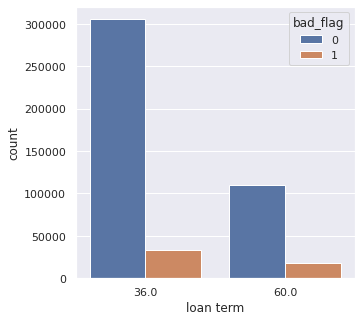

In [131]:
ax = sns.countplot(x="loan term", hue="bad_flag", data=data)

In [132]:
#Binning
interval_range = pd.interval_range(start=0, freq=10000, end=40000)
data['loan amount'] = pd.cut(data['loan_amnt'], bins=interval_range)

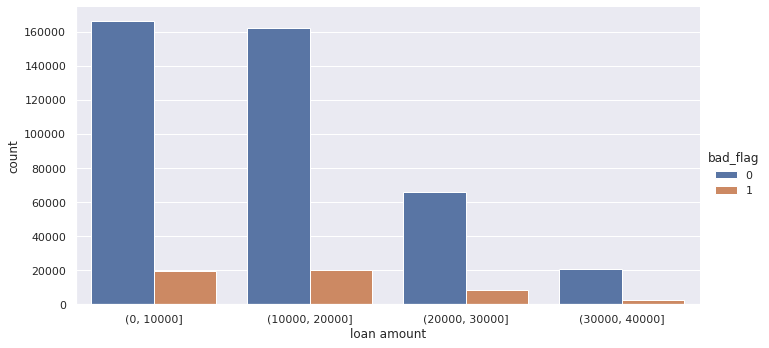

In [133]:
g = sns.catplot(x="loan amount", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);


In [134]:
data_home = data[['home_ownership','bad_flag']].sort_values(by=['home_ownership'])

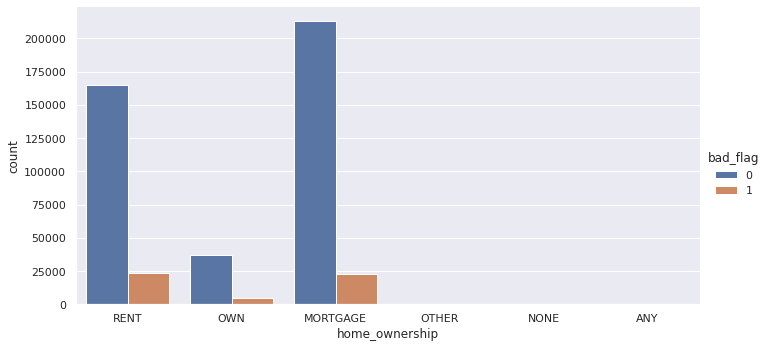

In [135]:
g = sns.catplot(x="home_ownership", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);

In [136]:
interval_range = pd.interval_range(start=0, freq=5, end=30)
data['Interest Rate'] = pd.cut(data['int_rate'], bins=interval_range)

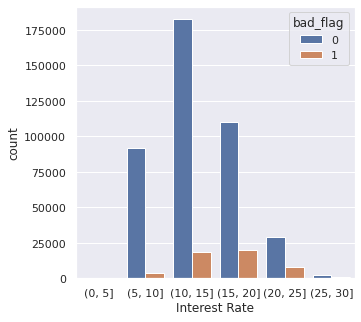

In [137]:
ax = sns.countplot(x="Interest Rate", hue="bad_flag", data=data)

In [138]:
#binning
interval_range = pd.interval_range(start=0, freq=10000, end=60000)
data['total payments investor'] = pd.cut(data['total_pymnt_inv'], bins=interval_range)

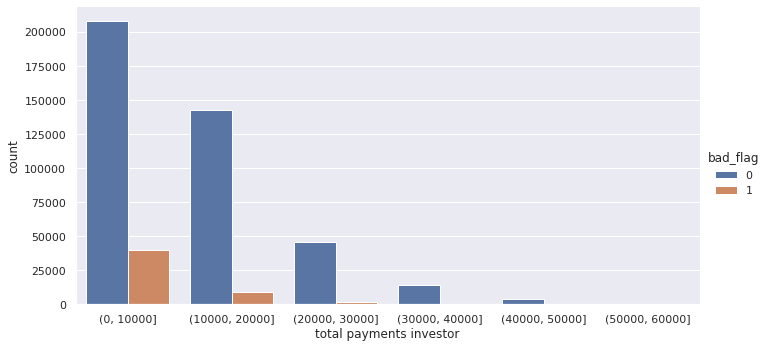

In [139]:
g = sns.catplot(x="total payments investor", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);

In [140]:
#binning
interval_range = pd.interval_range(start=0, freq=10000, end=60000)
data['total payments'] = pd.cut(data['total_pymnt'], bins=interval_range)

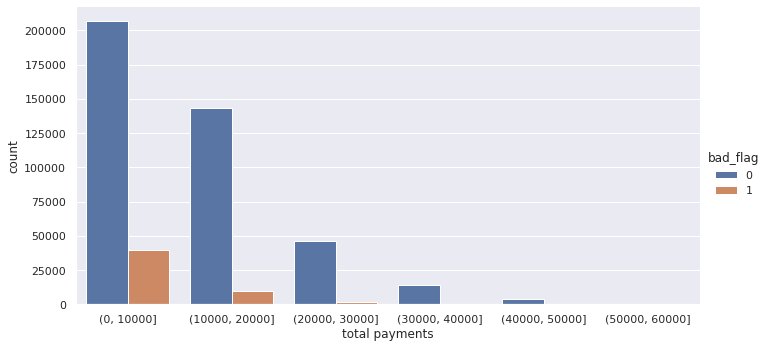

In [141]:
g = sns.catplot(x="total payments", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);

In [142]:
#binning
interval_range = pd.interval_range(start=0, freq=10000, end=60000)
data['Last total payment amount'] = pd.cut(data['last_pymnt_amnt'], bins=interval_range)

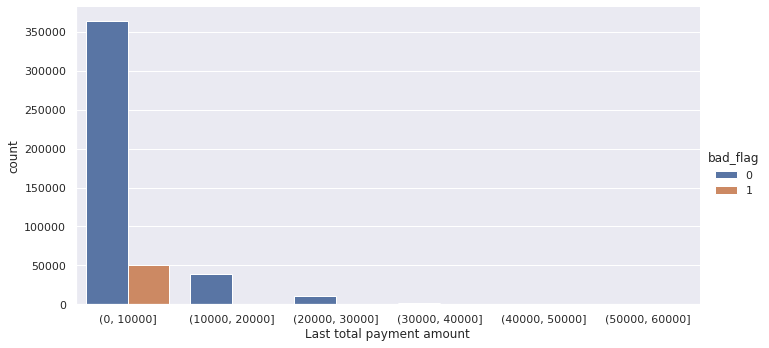

In [143]:
g = sns.catplot(x="Last total payment amount", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);

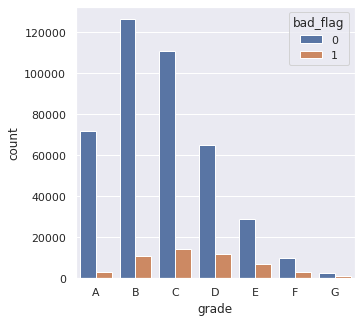

In [144]:
data_grade = data[['grade','bad_flag']].sort_values(by=['grade'])

ax = sns.countplot(x="grade", hue="bad_flag", data=data_grade)

In [145]:

#Binning annual_inc column
income_category_leves = ['Very_Low','Low', 'Medium', 'High','Very High']
data['annual income'] = pd.qcut(data['annual_inc'],q=[0, .2, .5, .8, .95, 1],
                              labels=income_category_leves) # Choosing unequal percentiles because there are outliers

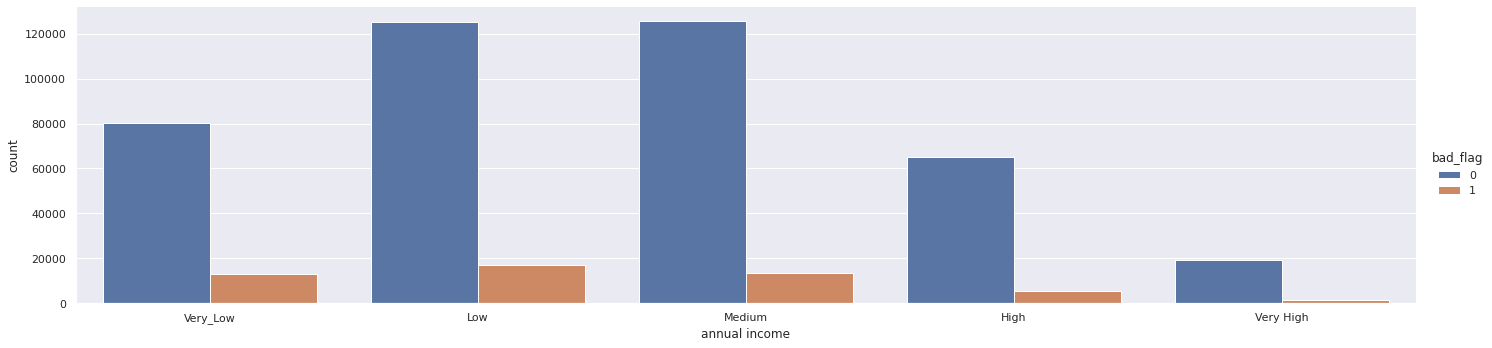

In [146]:
g = sns.catplot(x="annual income", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=4);

In [147]:
#binning
interval_range = pd.interval_range(start=0, freq=300, end=1500)
data['installment_'] = pd.cut(data['installment'], bins=interval_range)

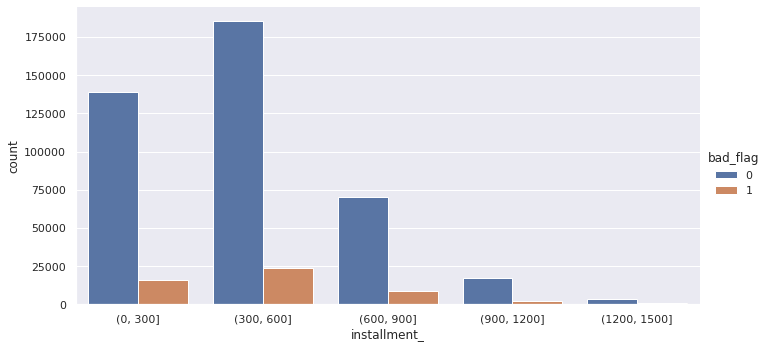

In [148]:
g = sns.catplot(x="installment_", hue="bad_flag", 
                data=data, kind="count",
                height=5, aspect=2);

In [ ]:
data = data.drop(columns=['loan amount','Interest Rate','total payments investor','total payments','Last total payment amount','annual income','installment_'])

## EDA
Kepemilikan rumah dengan status Hipotek atau mortgage memiliki peluang pengembalian yang lebih tinggi, namun juga resiko yang tinggi . secara keseluruhan perbedaannya tidak signifikan dengan status memiliki rumah sendiri dan sewa

Grade A,  F adalah grade dengan resiko rendah sedangkan grade B, C, E, D memiliki resiko tinggi

Semakin besar jumlah pinjaman, disini terlihat semakin kecil persentase uang pinjaman yang dikembalikan

Semakin tinggi tingkat bunga, semakin kecil kemungkinan uang pinjaman dikembalikan. Risiko tertinggi ketika suku bunga di atas 20%

Jangka waktu pinjaman di atas 36 bulan memiliki risiko tinggi,  uang pinjaman tidak dikembalikan

Semakin besar total Payments received yang diterima, semakin besar persentase uang pinjaman yang akan dikembalikan. Risiko tertinggi ketika total Payments received yang diterima di bawah 20000

Jumlah pembayaran terakhir di bawah 1500 memiliki risiko tinggi uang pinjaman tidak dikembalikan


### Correlation Check

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



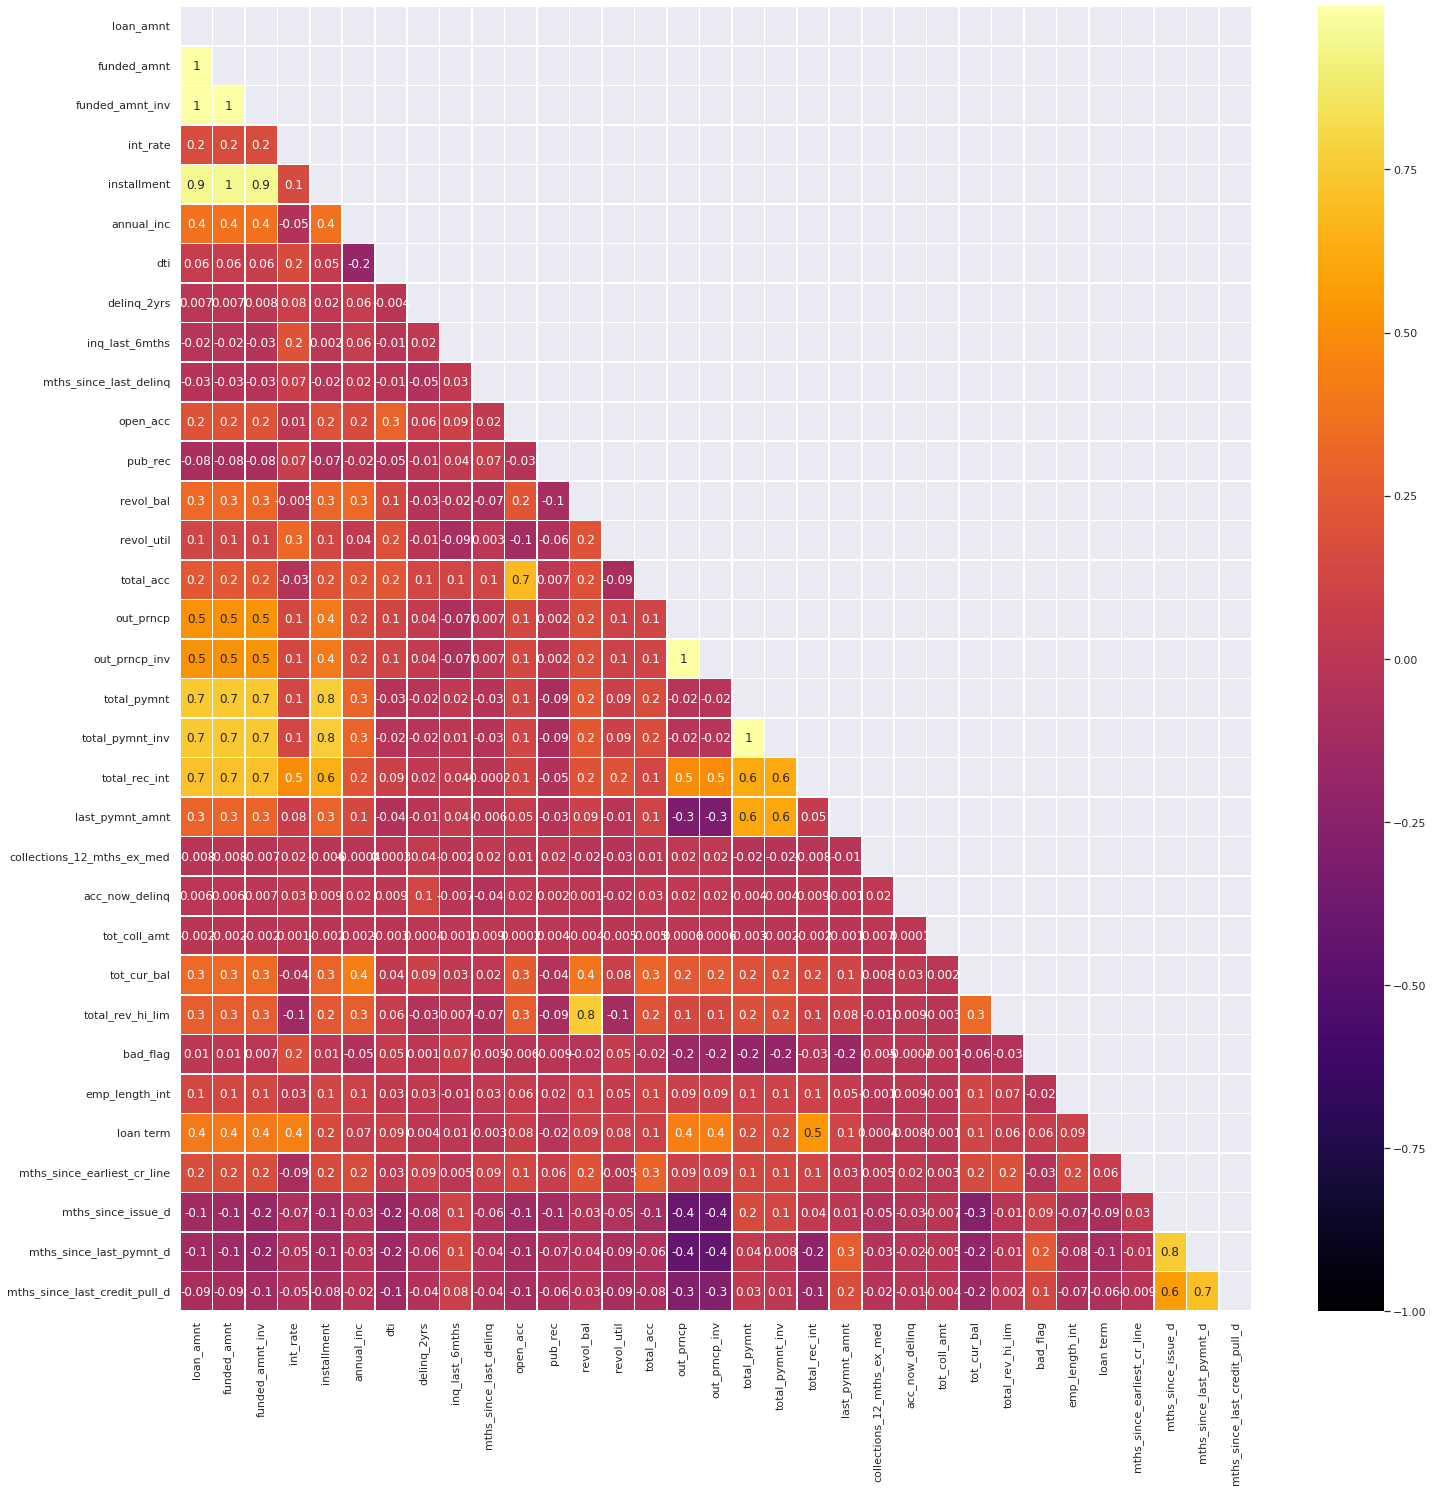

In [150]:
# correlation matrix with correlation co-effiecients 
import numpy as np
mask = np.zeros_like(data.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), mask=mask, annot=True,  cmap="inferno", vmin = -1, fmt='.1g', edgecolor='w', linewidth=0.6)

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [151]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [152]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d']

In [153]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [154]:
data.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
application_type        1
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [155]:
data.drop(['application_type'], axis=1, inplace=True)

In [156]:
data.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31902
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            146
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         113
out_prncp                      135665
last_pymnt_amnt                198194
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
loan term                           2
mths_since_earliest_cr_line       516
mths_since_issue_d                 91
dtype: int64

pada tipe data selain `object` aman tidak terdapat fitur yang hanya memiliki satu nilai unik saja.

In [157]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [158]:
data.drop('pymnt_plan', axis=1, inplace=True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   int_rate                     466285 non-null  float64
 2   grade                        466285 non-null  object 
 3   home_ownership               466285 non-null  object 
 4   annual_inc                   466285 non-null  float64
 5   verification_status          466285 non-null  object 
 6   purpose                      466285 non-null  object 
 7   addr_state                   466285 non-null  object 
 8   dti                          466285 non-null  float64
 9   delinq_2yrs                  466285 non-null  float64
 10  inq_last_6mths               466285 non-null  float64
 11  mths_since_last_delinq       466285 non-null  float64
 12  open_acc                     466285 non-null  float64
 13 

# FEATURE ENCODING  AND SCALING

### Mean Coding grade

In [160]:
freq_g= data['grade'].value_counts().reset_index()
freq_g.rename(columns={"index": "grade", "grade": "freq_grade"}, inplace = True)

sum_g = data.groupby(['grade']).agg({'bad_flag':sum}).reset_index()
sum_g.rename(columns={"bad_flag": "sum_grade"}, inplace = True)

mean_g = freq_g.merge(sum_g, on='grade', how='inner')
mean_g['mean_g_grade'] = round((mean_g['sum_grade']/mean_g['freq_grade']),2)

data = data.merge(mean_g[['grade','mean_g_grade']], on='grade', how='inner')
data[['grade','mean_g_grade']]

data.drop('grade', axis=1, inplace=True)

data.rename(columns = {"mean_g_grade": "grade"},inplace=True)

### Mean Coding home_ownership

In [161]:
freq_h= data['home_ownership'].value_counts().reset_index()
freq_h.rename(columns={"index": "home_ownership", "home_ownership": "freq_home_ownership"}, inplace = True)

sum_h = data.groupby(['home_ownership']).agg({'bad_flag':sum}).reset_index()
sum_h.rename(columns={"bad_flag": "sum_home_ownership"}, inplace = True)

mean_h = freq_h.merge(sum_h, on='home_ownership', how='inner')
mean_h['mean_h_home_ownership'] = round((mean_h['sum_home_ownership']/mean_h['freq_home_ownership']),2)

data = data.merge(mean_h[['home_ownership','mean_h_home_ownership']], on='home_ownership', how='inner')

data.drop('home_ownership', axis=1, inplace=True)
data.rename(columns = {"mean_h_home_ownership": "home_ownership"},inplace=True)

### Mean Coding purpose

In [162]:
freq_p= data['purpose'].value_counts().reset_index()
freq_p.rename(columns={"index": "purpose", "purpose": "freq_purpose"}, inplace = True)

sum_p = data.groupby(['purpose']).agg({'bad_flag':sum}).reset_index()
sum_p.rename(columns={"bad_flag": "sum_purpose"}, inplace = True)

mean_p = freq_p.merge(sum_p, on='purpose', how='inner')
mean_p['mean_p_purpose'] = round((mean_p['sum_purpose']/mean_p['freq_purpose']),2)

data = data.merge(mean_p[['purpose','mean_p_purpose']], on='purpose', how='inner')
data[['purpose','mean_p_purpose']]

data.drop('purpose', axis=1, inplace=True)

data.rename(columns = {"mean_p_purpose": "purpose"},inplace=True)

### Mean Coding purpose

In [163]:
freq_a= data['addr_state'].value_counts().reset_index()
freq_a.rename(columns={"index": "addr_state", "addr_state": "freq_addr_state"}, inplace = True)

sum_a = data.groupby(['addr_state']).agg({'bad_flag':sum}).reset_index()
sum_a.rename(columns={"bad_flag": "sum_addr_state"}, inplace = True)

mean_a = freq_a.merge(sum_a, on='addr_state', how='inner')
mean_a['mean_a_addr_state'] = round((mean_a['sum_addr_state']/mean_a['freq_addr_state']),2)

data = data.merge(mean_a[['addr_state','mean_a_addr_state']], on='addr_state', how='inner')
data[['addr_state','mean_a_addr_state']]

data.drop('addr_state', axis=1, inplace=True)

data.rename(columns = {"mean_a_addr_state": "addr_state"},inplace=True)

In [164]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['verification_status'])
data['verification_status'] = le.transform(data['verification_status']) 
le.fit(data['initial_list_status'])
data['initial_list_status'] = le.transform(data['initial_list_status']) 

### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

### Standardization

proses standarisasi dengan StandardScaler.

In [165]:
fitur = data.drop(['bad_flag'], axis=1)
fitur.head()

,loan_amnt,int_rate,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,loan term,mths_since_earliest_cr_line,mths_since_issue_d,grade,home_ownership,purpose,addr_state
0,5000,10.65,24000.0,2,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,0,0.0,171.62,0.0,0.0,0.0,0.0,10.0,36.0,395.0,72.0,0.08,0.13,0.09,0.11
1,10000,11.71,60000.0,0,12.16,1.0,0.0,20.0,11.0,0.0,7767,33.9,20.0,0,0.0,344.86,0.0,0.0,0.0,0.0,2.0,36.0,183.0,73.0,0.08,0.13,0.09,0.11
2,7000,9.91,62000.0,0,5.01,0.0,0.0,50.0,7.0,0.0,3839,58.2,36.0,0,0.0,3329.45,0.0,0.0,0.0,0.0,5.0,36.0,384.0,73.0,0.08,0.13,0.09,0.11
3,8000,10.65,60780.0,0,14.27,0.0,2.0,-1.0,15.0,0.0,14759,20.5,48.0,0,0.0,260.59,0.0,0.0,0.0,0.0,0.0,36.0,375.0,73.0,0.08,0.13,0.09,0.11
4,14000,11.49,105000.0,2,6.18,0.0,0.0,31.0,10.0,0.0,16206,79.8,27.0,0,0.0,483.57,0.0,0.0,0.0,0.0,3.0,36.0,298.0,76.0,0.08,0.13,0.09,0.11


In [166]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scale = ss.fit_transform(fitur) 

In [167]:
data_model = pd.concat([fitur, data[['bad_flag']]], axis=1)

#Outlier

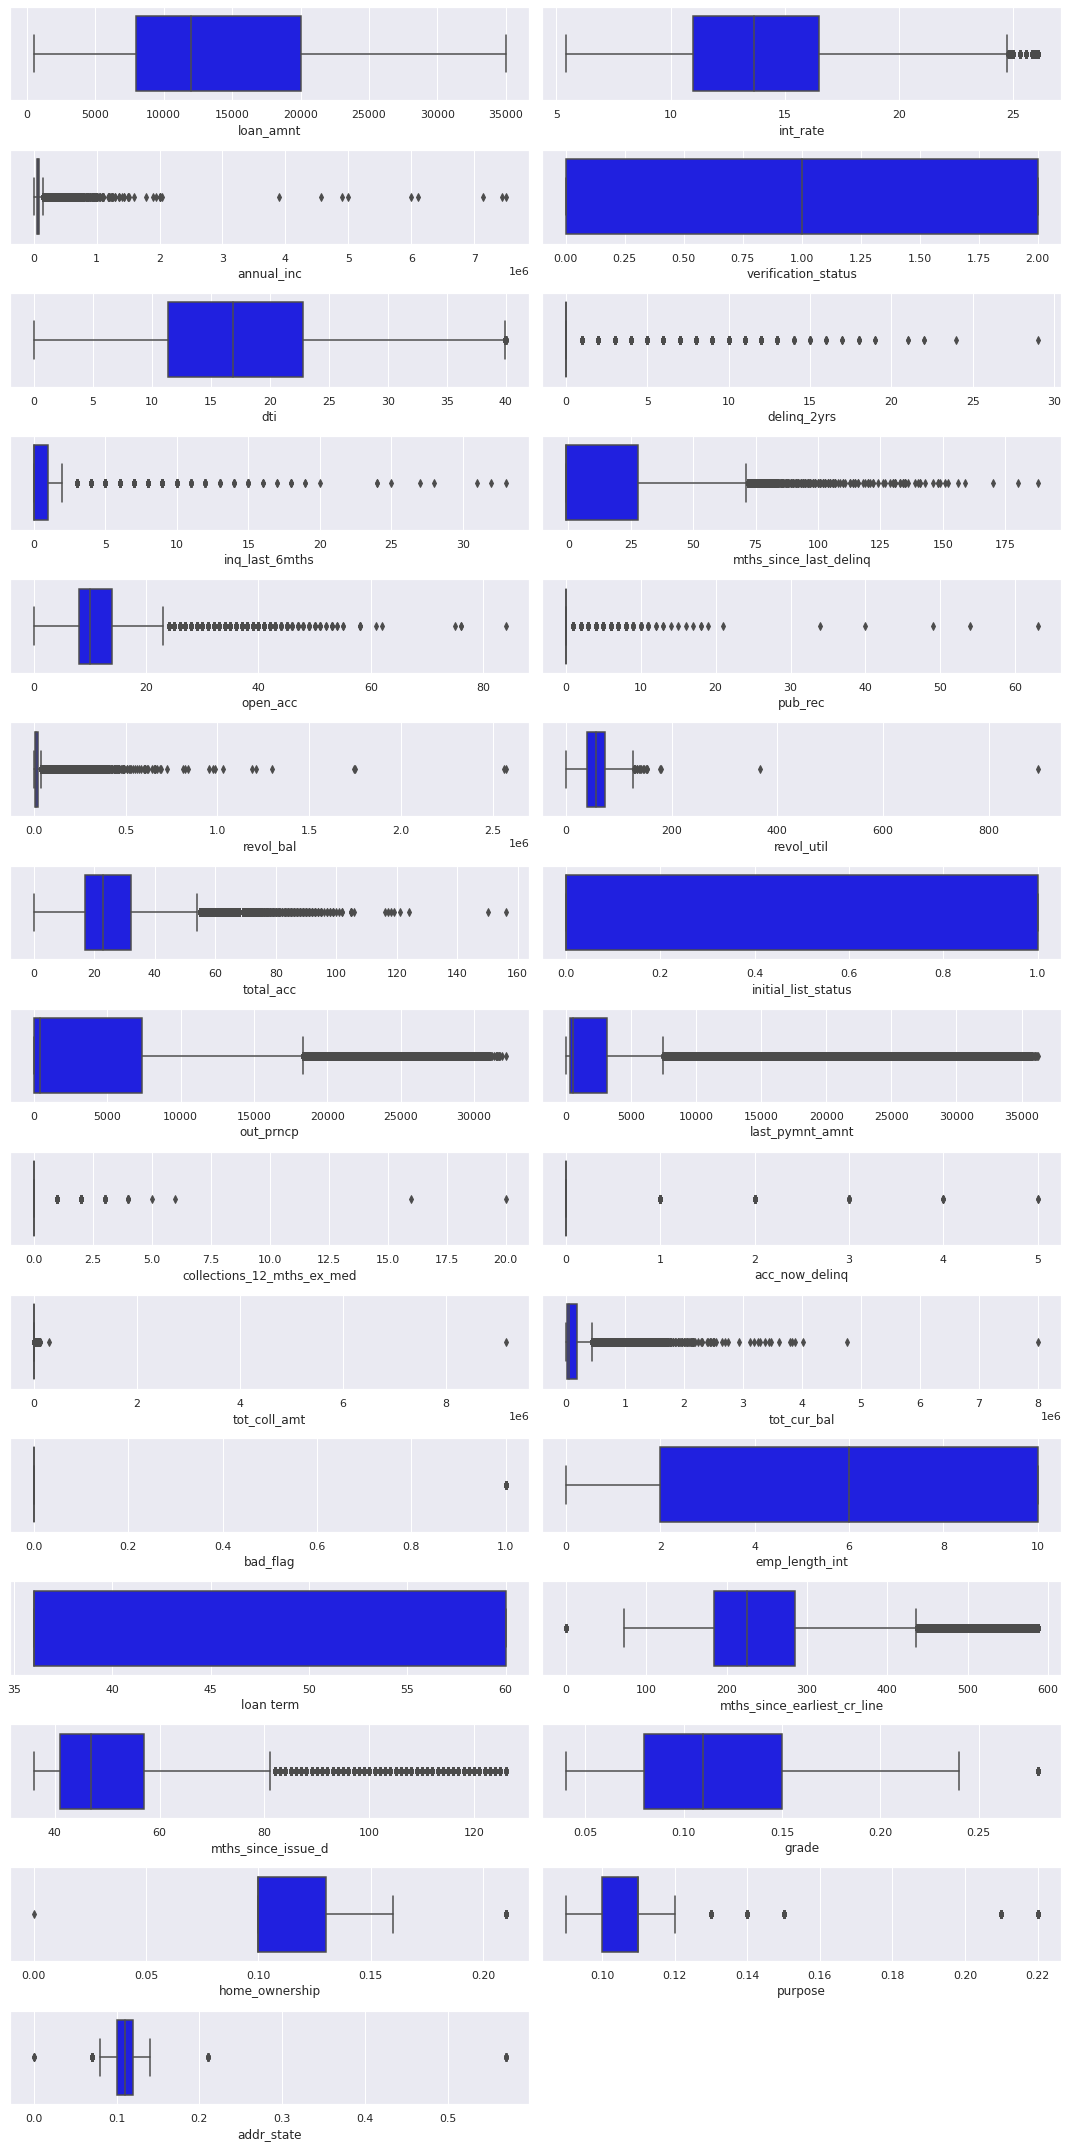

In [168]:
# boxplot visualization for numerical data

numericals = data.select_dtypes(exclude='object').columns

plt.figure(figsize=(15, 30))
for i in range(0, len(numericals)):
    plt.subplot(15, 2, i+1)
    sns.boxplot(x=data[numericals[i]], color='blue')
    plt.tight_layout()

plt.show()

Terlihat banyak Outlier, maka dari itu saat pemodelan nanti memilih model yang tidak sensitif dengan outlier

# MODELING CLASSIFICATION

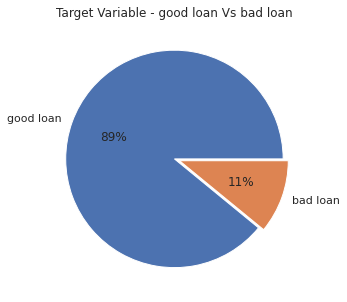

In [82]:
sns.set(rc={'figure.figsize':(5,5)})
plt.pie(data_model['bad_flag'].value_counts(normalize=True)*100,labels=['good loan','bad loan'],explode=(0,0.05),autopct='%1.f%%')
plt.title('Target Variable - good loan Vs bad loan')
plt.show()

Imbalance data maka menggunakan ROC AUC dibanding dengan accuracy


[hint](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

### Train-Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.shape, X_test.shape

((373028, 28), (93257, 28))

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#Decision Tree

In [169]:
# Fit - train
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=4)

# Train
dt.fit(X_train,y_train)

#Val Train
y_pred_train = dt.predict_proba(X_train)[:][:,1]
df_actual_pred_train_dt = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_train, columns=['y_pred_train'])], axis=1)
df_actual_pred_train_dt.index = y_train.index

fpr, tpr, tr = roc_curve(df_actual_pred_train_dt['y_actual'], df_actual_pred_train_dt['y_pred_train'])
auc_dt_train = roc_auc_score(df_actual_pred_train_dt['y_actual'], df_actual_pred_train_dt['y_pred_train'])

df_actual_pred_train_dt = df_actual_pred_train_dt.sort_values('y_pred_train')
df_actual_pred_train_dt = df_actual_pred_train_dt.reset_index()
df_actual_pred_train_dt['Cumulative N Population'] = df_actual_pred_train_dt.index + 1
df_actual_pred_train_dt['Cumulative N Bad'] = df_actual_pred_train_dt['y_actual'].cumsum()
df_actual_pred_train_dt['Cumulative N Good'] = df_actual_pred_train_dt['Cumulative N Population'] - df_actual_pred_train_dt['Cumulative N Bad']
df_actual_pred_train_dt['Cumulative Perc Population'] = df_actual_pred_train_dt['Cumulative N Population'] / df_actual_pred_train_dt.shape[0]
df_actual_pred_train_dt['Cumulative Perc Bad'] = df_actual_pred_train_dt['Cumulative N Bad'] / df_actual_pred_train_dt['y_actual'].sum()
df_actual_pred_train_dt['Cumulative Perc Good'] = df_actual_pred_train_dt['Cumulative N Good'] / (df_actual_pred_train_dt.shape[0] - df_actual_pred_train_dt['y_actual'].sum())
KS_dt_train = max(df_actual_pred_train_dt['Cumulative Perc Good'] - df_actual_pred_train_dt['Cumulative Perc Bad'])

#Val Test
y_pred_proba = dt.predict_proba(X_test)[:][:,1]
df_actual_pred_test_dt = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_pred_test_dt.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_pred_test_dt['y_actual'], df_actual_pred_test_dt['y_pred_proba'])
auc_dt_test = roc_auc_score(df_actual_pred_test_dt['y_actual'], df_actual_pred_test_dt['y_pred_proba'])

df_actual_pred_test_dt = df_actual_pred_test_dt.sort_values('y_pred_proba')
df_actual_pred_test_dt = df_actual_pred_test_dt.reset_index()
df_actual_pred_test_dt['Cumulative N Population'] = df_actual_pred_test_dt.index + 1
df_actual_pred_test_dt['Cumulative N Bad'] = df_actual_pred_test_dt['y_actual'].cumsum()
df_actual_pred_test_dt['Cumulative N Good'] = df_actual_pred_test_dt['Cumulative N Population'] - df_actual_pred_test_dt['Cumulative N Bad']
df_actual_pred_test_dt['Cumulative Perc Population'] = df_actual_pred_test_dt['Cumulative N Population'] / df_actual_pred_test_dt.shape[0]
df_actual_pred_test_dt['Cumulative Perc Bad'] = df_actual_pred_test_dt['Cumulative N Bad'] / df_actual_pred_test_dt['y_actual'].sum()
df_actual_pred_test_dt['Cumulative Perc Good'] = df_actual_pred_test_dt['Cumulative N Good'] / (df_actual_pred_test_dt.shape[0] - df_actual_pred_test_dt['y_actual'].sum())
KS_dt_test = max(df_actual_pred_test_dt['Cumulative Perc Good'] - df_actual_pred_test_dt['Cumulative Perc Bad'])


print('AUC Train \t\t: %.2f' % auc_dt_train)
print('AUC Test \t\t: %.2f' % auc_dt_test)


print('KS Train \t\t: %.2f' % KS_dt_train)
print('KS Test \t\t: %.2f' % KS_dt_test)

AUC Train 		: 0.93
AUC Test 		: 0.93
KS Train 		: 0.73
KS Test 		: 0.73


# Random Forest

In [170]:
# Fit - train
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=4)

# Train
rfc.fit(X_train,y_train)

#Val Train
y_pred_train = rfc.predict_proba(X_train)[:][:,1]
df_actual_pred_train_rfc = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_train, columns=['y_pred_train'])], axis=1)
df_actual_pred_train_rfc.index = y_train.index

fpr, tpr, tr = roc_curve(df_actual_pred_train_rfc['y_actual'], df_actual_pred_train_rfc['y_pred_train'])
auc_rf_train = roc_auc_score(df_actual_pred_train_rfc['y_actual'], df_actual_pred_train_rfc['y_pred_train'])

df_actual_pred_train_rfc = df_actual_pred_train_rfc.sort_values('y_pred_train')
df_actual_pred_train_rfc = df_actual_pred_train_rfc.reset_index()
df_actual_pred_train_rfc['Cumulative N Population'] = df_actual_pred_train_rfc.index + 1
df_actual_pred_train_rfc['Cumulative N Bad'] = df_actual_pred_train_rfc['y_actual'].cumsum()
df_actual_pred_train_rfc['Cumulative N Good'] = df_actual_pred_train_rfc['Cumulative N Population'] - df_actual_pred_train_rfc['Cumulative N Bad']
df_actual_pred_train_rfc['Cumulative Perc Population'] = df_actual_pred_train_rfc['Cumulative N Population'] / df_actual_pred_train_rfc.shape[0]
df_actual_pred_train_rfc['Cumulative Perc Bad'] = df_actual_pred_train_rfc['Cumulative N Bad'] / df_actual_pred_train_rfc['y_actual'].sum()
df_actual_pred_train_rfc['Cumulative Perc Good'] = df_actual_pred_train_rfc['Cumulative N Good'] / (df_actual_pred_train_rfc.shape[0] - df_actual_pred_train_rfc['y_actual'].sum())
KS_rf_train = max(df_actual_pred_train_rfc['Cumulative Perc Good'] - df_actual_pred_train_rfc['Cumulative Perc Bad'])

#Val Test
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_pred_test_rfc = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_pred_test_rfc.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_pred_test_rfc['y_actual'], df_actual_pred_test_rfc['y_pred_proba'])
auc_rf_test = roc_auc_score(df_actual_pred_test_rfc['y_actual'], df_actual_pred_test_rfc['y_pred_proba'])

df_actual_pred_test_rfc = df_actual_pred_test_rfc.sort_values('y_pred_proba')
df_actual_pred_test_rfc = df_actual_pred_test_rfc.reset_index()
df_actual_pred_test_rfc['Cumulative N Population'] = df_actual_pred_test_rfc.index + 1
df_actual_pred_test_rfc['Cumulative N Bad'] = df_actual_pred_test_rfc['y_actual'].cumsum()
df_actual_pred_test_rfc['Cumulative N Good'] = df_actual_pred_test_rfc['Cumulative N Population'] - df_actual_pred_test_rfc['Cumulative N Bad']
df_actual_pred_test_rfc['Cumulative Perc Population'] = df_actual_pred_test_rfc['Cumulative N Population'] / df_actual_pred_test_rfc.shape[0]
df_actual_pred_test_rfc['Cumulative Perc Bad'] = df_actual_pred_test_rfc['Cumulative N Bad'] / df_actual_pred_test_rfc['y_actual'].sum()
df_actual_pred_test_rfc['Cumulative Perc Good'] = df_actual_pred_test_rfc['Cumulative N Good'] / (df_actual_pred_test_rfc.shape[0] - df_actual_pred_test_rfc['y_actual'].sum())
KS_rf_test = max(df_actual_pred_test_rfc['Cumulative Perc Good'] - df_actual_pred_test_rfc['Cumulative Perc Bad'])


print('AUC Train \t\t: %.2f' % auc_rf_train)
print('AUC Test \t\t: %.2f' % auc_rf_test)


print('KS Train \t\t: %.2f' % KS_rf_train)
print('KS Test \t\t: %.2f' % KS_rf_test)

AUC Train 		: 0.91
AUC Test 		: 0.91
KS Train 		: 0.73
KS Test 		: 0.73


#XgBoost Classifier

In [171]:
# Fit - train
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=42, max_depth=4)

# Train
xgb.fit(X_train, y_train)

#Val Train
y_pred_train = xgb.predict_proba(X_train)[:][:,1]
df_actual_pred_train_xgb = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_train, columns=['y_pred_train'])], axis=1)
df_actual_pred_train_xgb.index = y_train.index

fpr, tpr, tr = roc_curve(df_actual_pred_train_xgb['y_actual'], df_actual_pred_train_xgb['y_pred_train'])
auc_xgb_train = roc_auc_score(df_actual_pred_train_xgb['y_actual'], df_actual_pred_train_xgb['y_pred_train'])

df_actual_pred_train_xgb = df_actual_pred_train_xgb.sort_values('y_pred_train')
df_actual_pred_train_xgb = df_actual_pred_train_xgb.reset_index()
df_actual_pred_train_xgb['Cumulative N Population'] = df_actual_pred_train_xgb.index + 1
df_actual_pred_train_xgb['Cumulative N Bad'] = df_actual_pred_train_xgb['y_actual'].cumsum()
df_actual_pred_train_xgb['Cumulative N Good'] = df_actual_pred_train_xgb['Cumulative N Population'] - df_actual_pred_train_xgb['Cumulative N Bad']
df_actual_pred_train_xgb['Cumulative Perc Population'] = df_actual_pred_train_xgb['Cumulative N Population'] / df_actual_pred_train_xgb.shape[0]
df_actual_pred_train_xgb['Cumulative Perc Bad'] = df_actual_pred_train_xgb['Cumulative N Bad'] / df_actual_pred_train_xgb['y_actual'].sum()
df_actual_pred_train_xgb['Cumulative Perc Good'] = df_actual_pred_train_xgb['Cumulative N Good'] / (df_actual_pred_train_xgb.shape[0] - df_actual_pred_train_xgb['y_actual'].sum())
KS_xgb_train = max(df_actual_pred_train_xgb['Cumulative Perc Good'] - df_actual_pred_train_xgb['Cumulative Perc Bad'])

#Val Test
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]
df_actual_pred_test_xgb = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_pred_test_xgb.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_pred_test_xgb['y_actual'], df_actual_pred_test_xgb['y_pred_proba'])
auc_xgb_test = roc_auc_score(df_actual_pred_test_xgb['y_actual'], df_actual_pred_test_xgb['y_pred_proba'])

df_actual_pred_test_xgb = df_actual_pred_test_xgb.sort_values('y_pred_proba')
df_actual_pred_test_xgb = df_actual_pred_test_xgb.reset_index()
df_actual_pred_test_xgb['Cumulative N Population'] = df_actual_pred_test_xgb.index + 1
df_actual_pred_test_xgb['Cumulative N Bad'] = df_actual_pred_test_xgb['y_actual'].cumsum()
df_actual_pred_test_xgb['Cumulative N Good'] = df_actual_pred_test_xgb['Cumulative N Population'] - df_actual_pred_test_xgb['Cumulative N Bad']
df_actual_pred_test_xgb['Cumulative Perc Population'] = df_actual_pred_test_xgb['Cumulative N Population'] / df_actual_pred_test_xgb.shape[0]
df_actual_pred_test_xgb['Cumulative Perc Bad'] = df_actual_pred_test_xgb['Cumulative N Bad'] / df_actual_pred_test_xgb['y_actual'].sum()
df_actual_pred_test_xgb['Cumulative Perc Good'] = df_actual_pred_test_xgb['Cumulative N Good'] / (df_actual_pred_test_xgb.shape[0] - df_actual_pred_test_xgb['y_actual'].sum())
KS_xgb_test = max(df_actual_pred_test_xgb['Cumulative Perc Good'] - df_actual_pred_test_xgb['Cumulative Perc Bad'])


print('AUC Train \t\t: %.2f' % auc_xgb_train)
print('AUC Test \t\t: %.2f' % auc_xgb_test)


print('KS Train \t\t: %.2f' % KS_xgb_train)
print('KS Test \t\t: %.2f' % KS_xgb_test)

AUC Train 		: 0.94
AUC Test 		: 0.94
KS Train 		: 0.75
KS Test 		: 0.75


Evaluation & selection base model for Tuning

In [172]:
result = pd.DataFrame({'Algorithm used':['XgBoost','Decission Tree','Random Forest'],
                       'AUC Train':[auc_xgb_train,auc_dt_train,auc_rf_train],
                       'AUC Test':[auc_xgb_test,auc_dt_test,auc_rf_test],
                       'KS Train':[KS_xgb_train,KS_dt_train,KS_rf_train],
                       'KS Test':[KS_xgb_test,KS_dt_test,KS_rf_test]
                        })
# result
sorted_df = result.sort_values(by=['AUC Train'], ascending=False).reset_index().drop('index', 1)
sorted_df.round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Algorithm used,AUC Train,AUC Test,KS Train,KS Test
0,XgBoost,0.94,0.94,0.75,0.75
1,Decission Tree,0.93,0.93,0.73,0.73
2,Random Forest,0.91,0.91,0.73,0.73


#Perbandingan Hasil Evaluasi

In [173]:
result = pd.DataFrame({'Algorithm used':['XgBoost','Decission Tree','Random Forest'],
                       'AUC':[auc_xgb_test,auc_dt_test,auc_rf_test],
                       'KS':[KS_xgb_test,KS_dt_test,KS_rf_test]
                        })
# result
sorted_df = result.sort_values(by=['AUC'], ascending=False).reset_index().drop('index', 1)
sorted_df.round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Algorithm used,AUC,KS
0,XgBoost,0.94,0.75
1,Decission Tree,0.93,0.73
2,Random Forest,0.91,0.73


#Tunning

In [174]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [176]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [177]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.8911180930117847
SCORE:
0.891

In [178]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8063183736295105, 'gamma': 2.021743250339986, 'max_depth': 13.0, 'min_child_weight': 3.0, 'reg_alpha': 48.0, 'reg_lambda': 0.4864903881394641}


In [179]:
# convert to string
def hapus_karakter_unik(a):
    a = a.replace("'","") 
    a = a.replace('"',"'")
    a = a.replace('{',"")
    a = a.replace('}',"")
    a = a.replace(':',"=")
    a = a.replace('.0,',",")
    return a

best_hyperparameters = str(best_hyperparams)
best_hyperparameters = hapus_karakter_unik(best_hyperparameters)
print(best_hyperparameters)
# def paramTuning():
#     return print(best_hyperparameters)
# paramTuning()

colsample_bytree= 0.8063183736295105, gamma= 2.021743250339986, max_depth= 13, min_child_weight= 3, reg_alpha= 48, reg_lambda= 0.4864903881394641


In [180]:
from hyperopt import space_eval
bparamsdict = space_eval(space, best_hyperparams)
xgb_best_params_tuning = pd.DataFrame(list(bparamsdict.items()), columns = ['parameter','Value'])
bestparams0 = float(xgb_best_params_tuning['Value'][0])
bestparams1 = float(xgb_best_params_tuning['Value'][1]) 
bestparams2 = int(xgb_best_params_tuning['Value'][2]) 
bestparams3 = int(xgb_best_params_tuning['Value'][3])
bestparams4 = int(xgb_best_params_tuning['Value'][4])
bestparams5 = int(xgb_best_params_tuning['Value'][5]) 
bestparams6 = float(xgb_best_params_tuning['Value'][6])
bestparams7 = int(xgb_best_params_tuning['Value'][7])
xgb_best_params_tuning

,parameter,Value
0,colsample_bytree,0.806318
1,gamma,2.021743
2,max_depth,13.000000
3,min_child_weight,3.000000
4,n_estimators,180.000000
5,reg_alpha,48.000000
6,reg_lambda,0.486490
7,seed,0.000000


In [181]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Penyetingan menggunakan parameter terbaik.
xgb = xgb.XGBClassifier(colsample_bytree = bestparams0, 
                        gamma = bestparams1, 
                        max_depth = bestparams2, 
                        min_child_weight = bestparams3,
                        n_estimators = bestparams4,
                        reg_alpha = bestparams5, 
                       seed = bestparams7,
                       reg_lambda = bestparams6)

# Train
xgb.fit(X_train, y_train)


XGBClassifier(colsample_bytree=0.8063183736295105, gamma=2.021743250339986,
              max_depth=13, min_child_weight=3, n_estimators=180, reg_alpha=48,
              reg_lambda=0.4864903881394641, seed=0)

In [183]:
#Val Train
y_pred_train = xgb.predict_proba(X_train)[:][:,1]
df_actual_pred_train_xgb = pd.concat([pd.DataFrame(np.array(y_train), columns=['y_actual']), pd.DataFrame(y_pred_train, columns=['y_pred_train'])], axis=1)
df_actual_pred_train_xgb.index = y_train.index

fpr, tpr, tr = roc_curve(df_actual_pred_train_xgb['y_actual'], df_actual_pred_train_xgb['y_pred_train'])
auc_xgb_train = roc_auc_score(df_actual_pred_train_xgb['y_actual'], df_actual_pred_train_xgb['y_pred_train'])

df_actual_pred_train_xgb = df_actual_pred_train_xgb.sort_values('y_pred_train')
df_actual_pred_train_xgb = df_actual_pred_train_xgb.reset_index()
df_actual_pred_train_xgb['Cumulative N Population'] = df_actual_pred_train_xgb.index + 1
df_actual_pred_train_xgb['Cumulative N Bad'] = df_actual_pred_train_xgb['y_actual'].cumsum()
df_actual_pred_train_xgb['Cumulative N Good'] = df_actual_pred_train_xgb['Cumulative N Population'] - df_actual_pred_train_xgb['Cumulative N Bad']
df_actual_pred_train_xgb['Cumulative Perc Population'] = df_actual_pred_train_xgb['Cumulative N Population'] / df_actual_pred_train_xgb.shape[0]
df_actual_pred_train_xgb['Cumulative Perc Bad'] = df_actual_pred_train_xgb['Cumulative N Bad'] / df_actual_pred_train_xgb['y_actual'].sum()
df_actual_pred_train_xgb['Cumulative Perc Good'] = df_actual_pred_train_xgb['Cumulative N Good'] / (df_actual_pred_train_xgb.shape[0] - df_actual_pred_train_xgb['y_actual'].sum())
KS_xgb_train = max(df_actual_pred_train_xgb['Cumulative Perc Good'] - df_actual_pred_train_xgb['Cumulative Perc Bad'])

#Val Test
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]
df_actual_pred_test_xgb = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_pred_test_xgb.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_pred_test_xgb['y_actual'], df_actual_pred_test_xgb['y_pred_proba'])
auc_xgb_test = roc_auc_score(df_actual_pred_test_xgb['y_actual'], df_actual_pred_test_xgb['y_pred_proba'])

df_actual_pred_test_xgb = df_actual_pred_test_xgb.sort_values('y_pred_proba')
df_actual_pred_test_xgb = df_actual_pred_test_xgb.reset_index()
df_actual_pred_test_xgb['Cumulative N Population'] = df_actual_pred_test_xgb.index + 1
df_actual_pred_test_xgb['Cumulative N Bad'] = df_actual_pred_test_xgb['y_actual'].cumsum()
df_actual_pred_test_xgb['Cumulative N Good'] = df_actual_pred_test_xgb['Cumulative N Population'] - df_actual_pred_test_xgb['Cumulative N Bad']
df_actual_pred_test_xgb['Cumulative Perc Population'] = df_actual_pred_test_xgb['Cumulative N Population'] / df_actual_pred_test_xgb.shape[0]
df_actual_pred_test_xgb['Cumulative Perc Bad'] = df_actual_pred_test_xgb['Cumulative N Bad'] / df_actual_pred_test_xgb['y_actual'].sum()
df_actual_pred_test_xgb['Cumulative Perc Good'] = df_actual_pred_test_xgb['Cumulative N Good'] / (df_actual_pred_test_xgb.shape[0] - df_actual_pred_test_xgb['y_actual'].sum())
KS_xgb_test = max(df_actual_pred_test_xgb['Cumulative Perc Good'] - df_actual_pred_test_xgb['Cumulative Perc Bad'])


print('AUC Train \t\t: %.2f' % auc_xgb_train)
print('AUC Test \t\t: %.2f' % auc_xgb_test)


print('KS Train \t\t: %.2f' % KS_xgb_train)
print('KS Test \t\t: %.2f' % KS_xgb_test)

AUC Train 		: 0.97
AUC Test 		: 0.96
KS Train 		: 0.81
KS Test 		: 0.79


#Grafik AUC & KS

#### AUC 

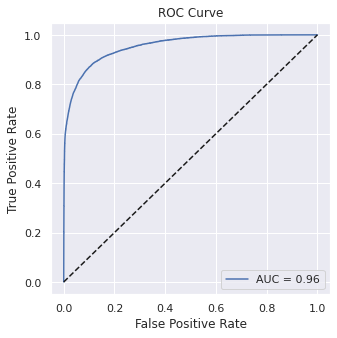

In [ ]:
auc_xgb_test = roc_auc_score(df_actual_pred_test_xgb['y_actual'], df_actual_pred_test_xgb['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.2f' %auc_xgb_test)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS 

In [ ]:
df_actual_pred_test_xgb.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,420572,0,0.000395,1,0,1,0.000011,0.0,0.000012
1,332770,0,0.000419,2,0,2,0.000021,0.0,0.000024
2,41584,0,0.000422,3,0,3,0.000032,0.0,0.000036
3,98150,0,0.000429,4,0,4,0.000043,0.0,0.000048
4,391944,0,0.000433,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.77')

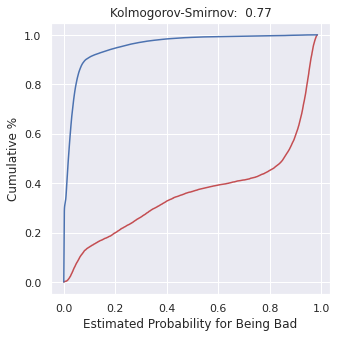

In [ ]:
KS = max(df_actual_pred_test_xgb['Cumulative Perc Good'] - df_actual_pred_test_xgb['Cumulative Perc Bad'])

plt.plot(df_actual_pred_test_xgb['y_pred_proba'], df_actual_pred_test_xgb['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_pred_test_xgb['y_pred_proba'], df_actual_pred_test_xgb['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.2f' %KS)

Model yang dibangun menghasilkan performa AUC = 0.857 dan KS = 0.56. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

#Feature importance

In [ ]:
# !pip install shap

In [ ]:
import shap

In [ ]:

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

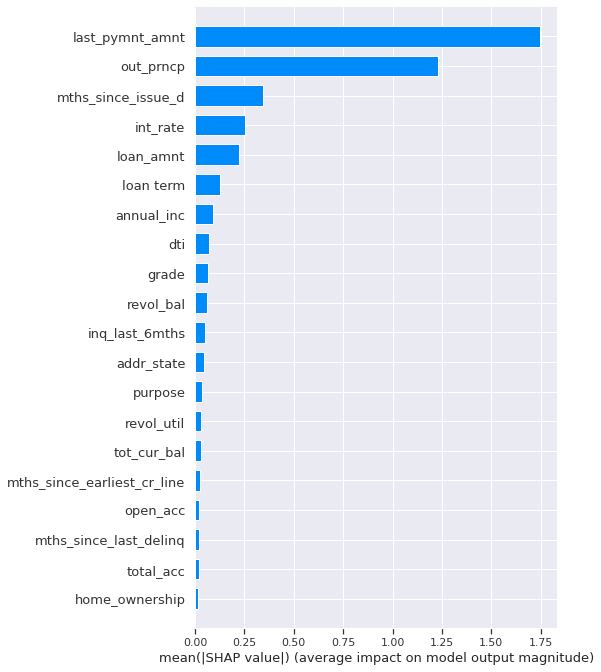

In [ ]:

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Kesimpulan

Peminjam yang bertempat tinggal  di rumah dengan status sewa atau rumahnya sedang dijaminkan memiliki risiko gagal bayar yang lebih tinggi

Peminjam dengan Suku Bunga di atas 20% ada kecenderungan gagal bayar
Peminjam dengan jangka waktu di atas 36 bulan memiliki risiko lebih tinggi untuk gagal bayar

Peminjam dengan Grade B,C,D,E memiliki resiko lebih tinggi gagal bayar

Untuk meminimalkan risiko kredit, ketika perusahaan menemukan peminjam dengan kredit macet.
Saat pinjaman masih berjalan (maka lihat Jumlah pembayaran terakhir yang sudah diterima & pokok yang belum dibayar), dari sini perusahaan dapat memberikan opsi untuk memberikan restrukturisasi pembiayaan agar peminjam mampu melakukan pembayaran dan menyelesaikan kreditnya.

Perusahaan sebaiknya mempertimbangkan untuk memperbanyak produk-produk dengan suku bunga di bawah 20% dan dengan jangka waktu pinjaman 60 bulan. Agar bisa memberikan lebih banyak pilihan kredit yang sesuai dengan profil prospek peminjam. Sehingga dikemudian hari resiko kredit ini terminimalisir.
